In [1]:
require(tidyverse)
require(ggplot2)
require(data.table)
require(viridis)
require(patchwork)
library(ggrastr)

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: viridis

Loading required package: viridi

In [2]:
df<-read.csv("06_B_cell_flow/density_data_CD27neg.csv")
iso_percentage<-read.csv("06_B_cell_flow/iso.perc.eff.csv")

Warning message:
“Removed 110 rows containing missing values or values outside the scale range
(`geom_point()`).”


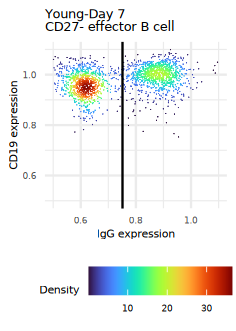

In [3]:
options(repr.plot.width =50/25.4, repr.plot.height = 70/25.4)

p1 <- ggplot(df[df$group == "BR1",], aes(x = IgG, y = CD19)) + 
  #geom_density2d(color = "#CCCCCC") +
  geom_point_rast(aes(color = density), stroke = 0, size = 0.3)  + 
  scale_color_viridis(option = 'H', name = "Density", direction = 1) + 
  xlim(0.5, 1.1) +
 ylim(0.5, 1.1) +
  theme_minimal() + 
  geom_vline(xintercept = 0.75) + 
  ggtitle("Young-Day 7\nCD27- effector B cell") + 
  xlab(paste("IgG", "expression")) +
  ylab("CD19 expression") +
  theme(text = element_text(size = 6), 
        legend.position = 'bottom')+ 
guides(shape = guide_legend(override.aes = list(size = 0.1)))

p1

Warning message:
“Removed 114 rows containing missing values or values outside the scale range
(`geom_point()`).”


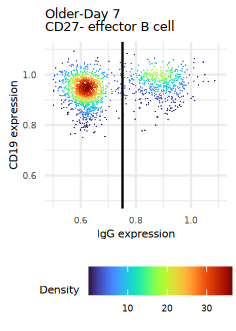

In [4]:
options(repr.plot.width =50/25.4, repr.plot.height = 70/25.4)

p2 <- ggplot(df[df$group == "BR2",], aes(x = IgG, y = CD19)) + 
  #geom_density2d(color = "#CCCCCC") +
  geom_point_rast(aes(color = density), stroke = 0, size = 0.3) + 
  scale_color_viridis(option = 'H', name = "Density", direction = 1) + 
  xlim(0.5, 1.1) +
ylim(0.5, 1.1) +
  theme_minimal() + 
  geom_vline(xintercept = 0.75) + 
  ggtitle("Older-Day 7\nCD27- effector B cell") + 
  xlab(paste("IgG", "expression")) +
  ylab("CD19 expression") +
  theme(text = element_text(size = 6), 
        legend.position = 'bottom')+ 
guides(shape = guide_legend(override.aes = list(size = 0.1)))

p2

In [8]:
options(repr.plot.width =90/25.4, repr.plot.height = 70/25.4)

p<-p1+p2
ggsave("FigureL.pdf",p,width=100/25.4 ,height = 70/25.4)

Warning message:
“Removed 110 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 114 rows containing missing values or values outside the scale range
(`geom_point()`).”


In [6]:
paste0(round(iso_percentage %>% filter(group == "BR2", 
                                       isotype == 'IgG') %>% select(P), 
                                   digits = 1), "%")

[1] "22%"

In [7]:
paste0(round(iso_percentage %>% filter(group == "BR1", 
                                       isotype == 'IgG') %>% select(P), 
                                   digits = 1), "%")

[1] "46.2%"